In [1]:
# all of the import statements

import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

[UNHCR Refugee Data](https://www.kaggle.com/unitednations/refugee-data) ( <code>refugee-data/</code> ) This dataset includes 6 csv files covering: 
<ul>
    <li> Asylum monthly applications opened (<code>asylum_seekers_monthly.csv</code>)</li>
    <li>Yearly progress through the refugee system (<code>asylum_seekers.csv</code>)</li>
    <li>Refugee demographics (<code>demographics.csv</code>)</li>
    <li>Yearly time series data on UNHCR’s populations of concern (<code>time_series.csv</code>)</li>
    <li>Yearly population statistics on refugees by residence and destination (<code>persons_of_concern.csv</code>)</li>
    <li>Yearly data on resettlement arrivals, with or without UNHCR assistance (<code>resettlement.csv</code>)</li></ul>
My Question ideas
<ol>
    <li> Which countries (of origin) had higher acceptance rates? Were the differences statistically significant? </li>
    <li>Which countries of resettlement accepted higher percentages of people? From which countries? What was the variance? </li>
    <li>Was there any statistical significance to the age of the applicants and the acceptance rate? **</li>
</ol>

### Which countries (of origin) had higher acceptance rates? Were the differences statistically significant? 

- First, get a list of all countries of origin. 
- Look at the data of decisions made - for each country, get the percentage accepted, rejected, etc
- Get the overall data, then you can break it down by year later (if you want)


In [2]:
monthly = pd.read_csv('datasets/refugee-data/asylum_seekers_monthly.csv', low_memory=False)
asylees = pd.read_csv('datasets/refugee-data/asylum_seekers.csv', low_memory=False)
demographics = pd.read_csv('datasets/refugee-data/demographics.csv', low_memory=False)
timeseries = pd.read_csv('datasets/refugee-data/time_series.csv', dtype=object)
poc = pd.read_csv('datasets/refugee-data/persons_of_concern.csv', dtype=object)
resettle = pd.read_csv('datasets/refugee-data/resettlement.csv', dtype=object)

monthly.iloc[:1,:]

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Australia,Afghanistan,1999,January,8


In [3]:
monthly['Values'] = pd.to_numeric(monthly['Value'], errors='coerce')

In [4]:
monthly.iloc[:3,:]

,Country / territory of asylum/residence,Origin,Year,Month,Value,Values
0,Australia,Afghanistan,1999,January,8,8.0
1,Australia,Afghanistan,1999,February,10,10.0
2,Australia,Afghanistan,1999,March,25,25.0


In [89]:
maxmonth = monthly.sort_values('Value', ascending=False).head(25)

monthly.groupby('Country / territory of asylum/residence').max().head(10)

# Countries that accepted the largest number of refugees in a month
#thing = maxmonth['Country / territory of asylum/residence']

#thing

#thing.set_names(['Country','Value'])

#thing.sort_values('Value', ascending=False)

,Origin,Year,Month,Value,Values
Country / territory of asylum/residence,,,,,
Albania,Uzbekistan,2017,September,85,587.0
Australia,Zimbabwe,2017,September,99,1066.0
Austria,Zimbabwe,2017,September,998,5482.0
Belgium,Zimbabwe,2017,September,99,2649.0
Bosnia and Herzegovina,United States of America,2017,September,9,445.0
Bulgaria,Zimbabwe,2017,September,99,1847.0
Canada,Zimbabwe,2017,September,997,1093.0
Croatia,Zimbabwe,2017,September,9,174.0
Cyprus,Zimbabwe,2017,September,98,1203.0


In [6]:
# of ppl in September 2017 from each country, in each country (pie charts)

#monthly.loc[lambda df: monthly['Year'] == 2017, :]

# for syntax purpoes
# movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

#monthly[(monthly['Year'] == 2017)]

#monthly[(monthly['Month'] == 'September')]

justone = monthly.loc[(monthly["Year"] == 2016) & (monthly["Month"] == 'September') & (monthly['Value'] !='*')]

inorder = justone.sort_values('Value', ascending=True).head(25)

inorder

,Country / territory of asylum/residence,Origin,Year,Month,Value,Values
313639,France,Togo,2016,September,10,10.0
331623,USA (INS/DHS),Rwanda,2016,September,10,10.0
322854,Rep. of Korea,Liberia,2016,September,10,10.0
309687,Canada,Russian Federation,2016,September,10,10.0
316912,Italy,Algeria,2016,September,10,10.0
310455,Cyprus,Bangladesh,2016,September,10,10.0
321494,Norway,Iraq,2016,September,10,10.0
316641,Ireland,Malaysia,2016,September,10,10.0
323397,Romania,Stateless,2016,September,10,10.0
306273,Australia,Palestinian,2016,September,10,10.0


In [7]:
# you could use the data below and compare with the data above - ie, how many ppl applied 
# for refugee status from El Salvador in June 2013 and how many were accepted, rejected, etc?

# could also compare which countries USA accepts refugees from most, vs which countries
# other countries accept refugees from the most?

# compare liklihood for resettlement in each country for ppl originating at a certain country
# over time

In [8]:
# the ints/floats are stored as strings, need to convert...

colnames = asylees.columns.values
asylees[colnames[4:]] = asylees[colnames[4:]].apply(pd.to_numeric, errors='coerce', axis=1).fillna(0.0)

# used this to double check that they were converted 
# asylees.info()

asylees.iloc[:8,:]

,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
1,2000,South Africa,Afghanistan,G / FI,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
2,2000,Uzbekistan,Afghanistan,U / FI,265.0,265.0,2156.0,747.0,0.0,112.0,327.0,1186.0,1235.0,1235.0
3,2000,United States of America,Afghanistan,G / EO,196.0,0.0,225.0,151.0,0.0,31.0,68.0,250.0,171.0,0.0
4,2000,United States of America,Afghanistan,G / IN,193.0,0.0,218.0,182.0,0.0,51.0,40.0,273.0,150.0,0.0
5,2000,Ukraine,Afghanistan,G / FI,40.0,0.0,662.0,275.0,0.0,412.0,0.0,687.0,23.0,0.0
6,2000,Turkey,Afghanistan,U / FI,67.0,67.0,81.0,29.0,0.0,24.0,49.0,102.0,46.0,46.0
7,2000,Turkmenistan,Afghanistan,U / FI,416.0,416.0,169.0,126.0,0.0,121.0,210.0,457.0,128.0,128.0


In [9]:
# working on question 1 - 1a First, get a list of all countries of origin.
# 1b Look at the data of decisions made - for each country, get the percentage accepted, rejected, etc
# 1c Get the overall data, then you can break it down by year later (if you want)

allthenames = asylees['Origin'].tolist()

alloriginsset = set(allthenames)

print(len(alloriginsset))
# get the # of items in the set to double check

all_origins = list(alloriginsset)

print(all_origins[:5])

222
['Grenada', 'Nauru', 'Dominican Rep.', 'Malta', 'Honduras']


In [74]:
# 1b

# getting the % (faiz) recognized for each row
asylees['faiz_accepted'] = ((asylees['decisions_recognized']) / (asylees['Total decisions'])*100)

# % (faiz) rejected
asylees['faiz_rejected'] = ((asylees['Rejected']) / (asylees['Total decisions'])*100)

In [75]:
asylees.iloc[:3,:]

,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year),faiz_accepted,faiz_rejected
0,2000,Zimbabwe,Afghanistan,G / FI,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,100.000000,0.000000
1,2000,South Africa,Afghanistan,G / FI,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,NaN,NaN
2,2000,Uzbekistan,Afghanistan,U / FI,265.0,265.0,2156.0,747.0,0.0,112.0,327.0,1186.0,1235.0,1235.0,62.984823,9.443508


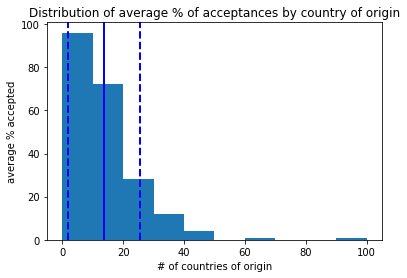

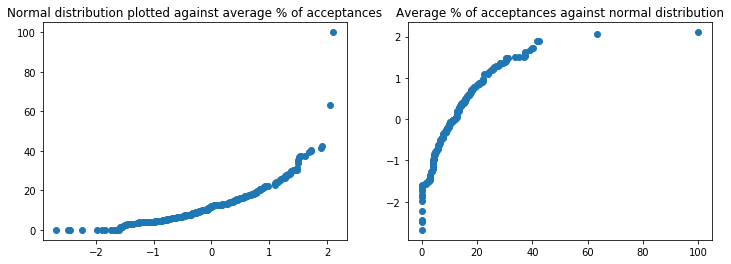

In [97]:
#asylees.iloc[:1,:]

asylees.columns.values
#asylees.groupby[:,'Country / territory of asylum/residence']

accepted = asylees.groupby('Origin')['faiz_accepted'].mean()

siusplau = accepted.sort_values()

plt.hist(siusplau[:-8])
# line at the mean
plt.axvline(siusplau[:-8].mean(), color='b', linestyle='solid', linewidth=2)

#line at 1 standard dev above mean
plt.axvline(siusplau[:-8].mean() + siusplau[:-8].std(), color='b', linestyle='dashed', linewidth=2)

#and 1 standard dev below the mean
plt.axvline(siusplau[:-8].mean() - siusplau[:-8].std(), color='b', linestyle='dashed', linewidth=2)

plt.title('Distribution of average % of acceptances by country of origin')
plt.xlabel('# of countries of origin')
plt.ylabel('average % accepted')
plt.show()


mean = 0 
sd = 1
n = 215

norm = np.random.normal(0, 1, 222)
norm.sort()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(norm, siusplau, "o") 
plt.title('Normal distribution plotted against average % of acceptances')

plt.subplot(1, 2, 2)
plt.plot(siusplau, norm, "o")
plt.title('Average % of acceptances against normal distribution')

plt.show() 

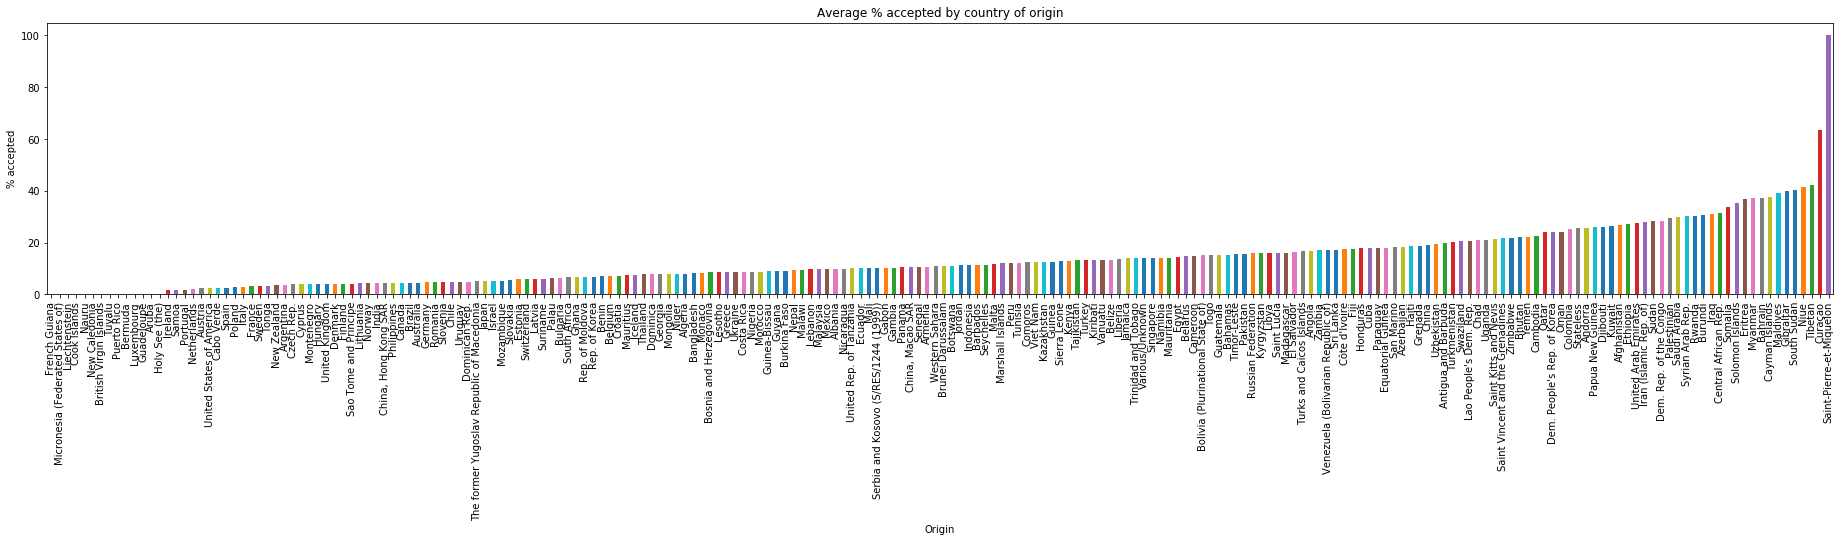

In [94]:
plt.figure(figsize=(32,5))

ax = siusplau[:-8].plot(kind='bar')

ax.set_ylabel('% accepted')
ax.set_title('Average % accepted by country of origin')
ax.set_xticklabels(siusplau[:-8].index.values)

plt.show()

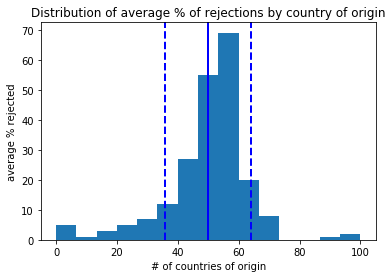

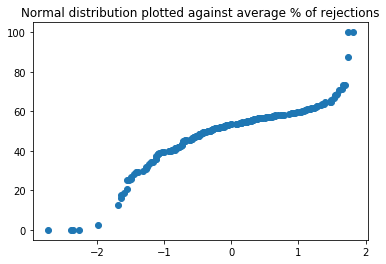

In [95]:
rejected = asylees.groupby('Origin')['faiz_rejected'].mean()
rejected.var()

rejected.std(ddof=1)

mehhh = rejected.sort_values(ascending=True)

mean = 0 
sd = 1
n = 215

#print(mehhh[:-7])
plt.hist(mehhh[:-7], bins=15)
# line at the mean
plt.axvline(mehhh[:-7].mean(), color='b', linestyle='solid', linewidth=2)

#line at 1 standard dev above mean
plt.axvline(mehhh[:-7].mean() + mehhh.std(), color='b', linestyle='dashed', linewidth=2)

#and 1 standard dev below the mean
plt.axvline(mehhh[:-7].mean() - mehhh.std(), color='b', linestyle='dashed', linewidth=2)

plt.title('Distribution of average % of rejections by country of origin')
plt.xlabel('# of countries of origin')
plt.ylabel('average % rejected')
plt.show()

# normal distribution to compare
norm = np.random.normal(0, 1, 222)
norm.sort()

plt.plot(norm, mehhh, "o") 
plt.title('Normal distribution plotted against average % of rejections')
plt.show() 

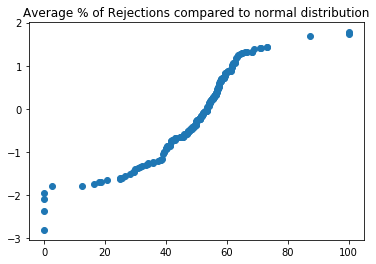

In [86]:
plt.plot(mehhh, norm, "o") 
plt.title('Average % of Rejections compared to normal distribution')
plt.show() 

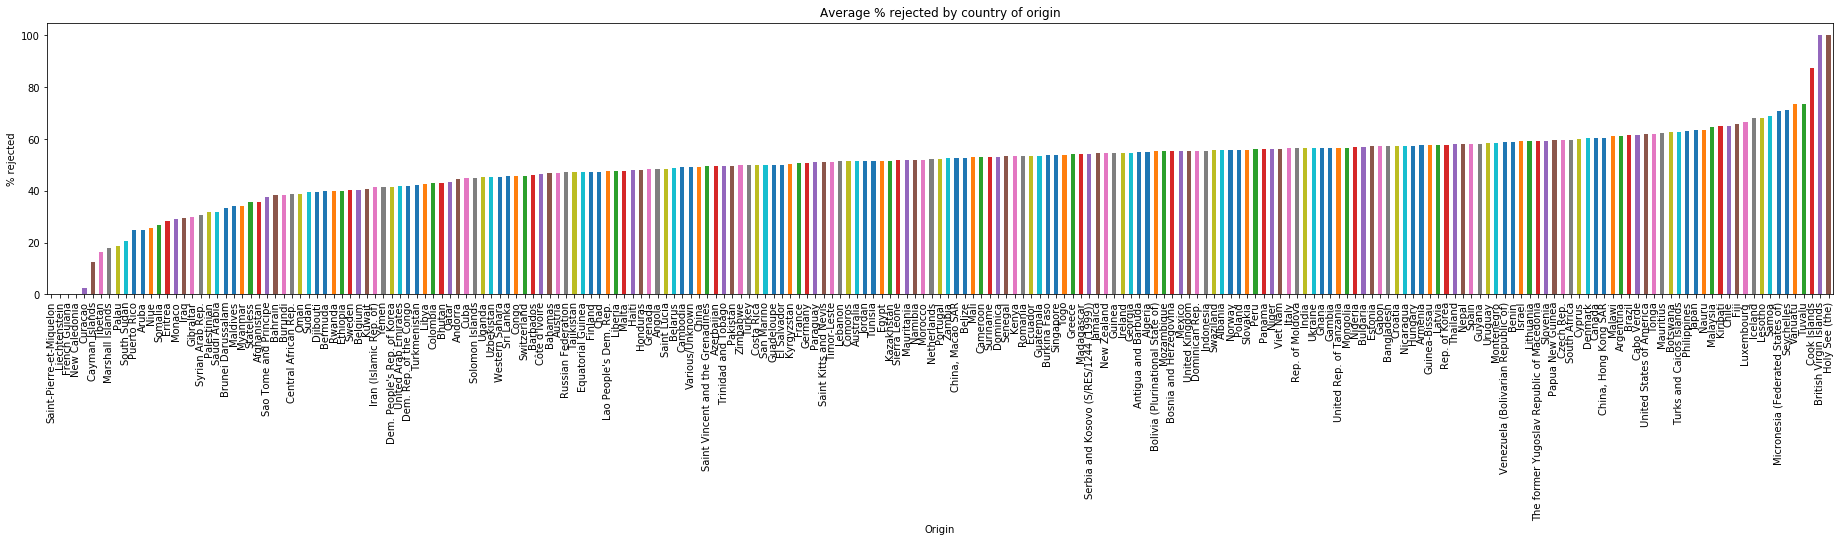

In [87]:
plt.figure(figsize=(32,5))

ax = mehhh[:-7].plot(kind='bar')

ax.set_ylabel('% rejected')
ax.set_title('Average % rejected by country of origin')
ax.set_xticklabels(mehhh[:-7].index.values)

plt.show()

### Which countries of resettlement accepted higher percentages of people? From which countries? What was the variance?

In [104]:
newlocs = asylees['Country / territory of asylum/residence'].tolist()

#to get rid of duplicates etc
all_newlocs = list(set(newlocs))

print(len(all_newlocs))
# get the # of items in the set to double check & to use later

190


In [105]:
# alphabetize it
all_newlocs.sort()

# this was just for me to see / double check the list
#print(all_newlocs)

In [106]:
# create dataframe to put top 5 rejected /accepted
#first get the col names
accepted5 = ['Resettled country']
rejected5 = []

to5 = np.arange(1,6)

for num in to5:
    accepted5.append('Top {} Accepted'.format(num))
    accepted5.append('Top {} Ac. percentage'.format(num))
    rejected5.append('Top {} Rejected'.format(num))
    rejected5.append('Top {} Re. percentage'.format(num))
    
colheader = accepted5+rejected5

rows_list = []
dict_list = [{}] * 190
i = 0

# now fill it up row by row
for loca in all_newlocs:

    # get a table of just refugees resettled in that country, no NaNs
    rstld = asylees[asylees['Country / territory of asylum/residence'] == loca].dropna(axis=0, how='any')   

    #get percentages for all of the countries in that smaller table
    accept_from_origin = rstld.groupby('Origin')['faiz_accepted'].mean()

    # top 5 most accepted % by country x
    top5 = accept_from_origin.sort_values(ascending=False).head(5)

    # create a list "row" to put the content
    row = [loca]
           
    # add top 5 most accepted
    for index, val in top5.iteritems():
        row.append(index)
        row.append(val)
    
    # top 5 most rejected % by country x, then add them

    reject_from_origin = rstld.groupby('Origin')['faiz_rejected'].mean()
    top5r = reject_from_origin.sort_values(ascending=False).head(5)

    for index, val in top5r.iteritems():
        row.append(index)
        row.append(val)
    
    # add to the dictionary 
    dict_list[i] = {}
    for header, content in zip(colheader,row):
        dict_list[i][header] = content

    i+=0
    # now adding the content for the country as a new row to the list of rows
    rows_list.append(dict_list[i])
    
    
# making the dataframe
alltop5s = pd.DataFrame(rows_list, columns=(colheader))  

#get rid of Nans
alltop5s.fillna(value=0.0, inplace=True)

alltop5s.iloc[:3,:]

,Resettled country,Top 1 Accepted,Top 1 Ac. percentage,Top 2 Accepted,Top 2 Ac. percentage,Top 3 Accepted,Top 3 Ac. percentage,Top 4 Accepted,Top 4 Ac. percentage,Top 5 Accepted,...,Top 1 Rejected,Top 1 Re. percentage,Top 2 Rejected,Top 2 Re. percentage,Top 3 Rejected,Top 3 Re. percentage,Top 4 Rejected,Top 4 Re. percentage,Top 5 Rejected,Top 5 Re. percentage
0,Afghanistan,Syrian Arab Rep.,100.0,Eritrea,100.0,Palestinian,50.0,Pakistan,40.937963,Iraq,...,Nigeria,100.0,Kyrgyzstan,100.0,Indonesia,100.000000,Tajikistan,83.333333,Palestinian,50.000000
1,Albania,Uzbekistan,100.0,Peru,100.0,Algeria,100.0,Libya,100.000000,Egypt,...,Belarus,100.0,Romania,25.0,Serbia and Kosovo (S/RES/1244 (1999)),12.416864,The former Yugoslav Republic of Macedonia,7.063492,Turkey,5.121269
2,Algeria,Mauritania,100.0,Russian Federation,100.0,Bosnia and Herzegovina,100.0,Spain,100.000000,Burundi,...,Zimbabwe,100.0,Ghana,100.0,Burkina Faso,86.868687,Benin,82.661456,Senegal,75.000000


In [126]:
# getting the average of top 5 accepted for each row
alltop5s['average of top 5 accepted %s'] = 0

# and lets do average of top 5 rejected at the same time
alltop5s['average of top 5 rejected %s'] = 0

for j in range(1,6):
    alltop5s['average of top 5 accepted %s'] += ((alltop5s['Top {} Ac. percentage'.format(j)]))
    alltop5s['average of top 5 rejected %s'] += ((alltop5s['Top {} Re. percentage'.format(j)]))

alltop5s['average of top 5 accepted %s'] = (alltop5s['average of top 5 accepted %s']/5)
alltop5s['average of top 5 rejected %s'] = (alltop5s['average of top 5 rejected %s']/5)
        

alltop5s.iloc[:7,:]

mostac = alltop5s.groupby(['Resettled country'])['average of top 5 accepted %s'].max().sort_values(ascending=False)

In [7]:
demographics.iloc[:3,:]

,Year,Country / territory of asylum/residence,Location Name,Female 0-4,Female 5-11,Female 5-17,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 12-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,Kabul,0,NaN,1.0,NaN,1,0,0.0,2,0,NaN,0.0,NaN,2,0,0.0,2
1,2001,Afghanistan,Various,14335,NaN,45451.0,NaN,99880,19234,412004.0,590904,14716,NaN,47522.0,NaN,114965,13025,435492.0,625720
2,2001,Afghanistan,Herat,0,NaN,0.0,NaN,1,0,0.0,1,0,NaN,0.0,NaN,1,0,0.0,1


### Question 3 Was there any statistical significance to the age of the applicants and the acceptance rate? 

In [200]:
la = demographics.drop(columns=['Location Name'])

from2 = la.columns.values

la.fillna(value=0.0, inplace=True)

for val in from2[1:]:
    la[val].apply(pd.to_numeric, errors='coerce') 
    
la.replace(to_replace='*', value=0.0)
    
#la.groupby(['Year'])['Female 5-17'].sum()


# maybe i can do what i'm trying to do above with a pivot table??

#attempt = la.pivot_table(values=["F: Total"], index=["Year","Country / territory of asylum/residence"], aggfunc=np.sum)
#print(attempt)

,Year,Country / territory of asylum/residence,Female 0-4,Female 5-11,Female 5-17,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 12-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,0,0,1.0,0,1,0,0.0,2,0,0,0.0,0,2,0,0.0,2
1,2001,Afghanistan,14335,0,45451.0,0,99880,19234,412004.0,590904,14716,0,47522.0,0,114965,13025,435492.0,625720
2,2001,Afghanistan,0,0,0.0,0,1,0,0.0,1,0,0,0.0,0,1,0,0.0,1
3,2001,Angola,484,0,1687.0,0,1282,43,0.0,3496,597,0,1645.0,0,787,34,0.0,3063
4,2001,Angola,219,0,734.0,0,427,25,0.0,1405,226,0,711.0,0,139,15,0.0,1091
5,2001,Angola,61,0,141.0,0,188,7,0.0,397,64,0,158.0,0,125,8,0.0,355
6,2001,Angola,7,0,109.0,0,141,2,0.0,259,9,0,119.0,0,199,34,0.0,361
7,2001,Angola,25,0,41.0,0,136,0,0.0,202,18,0,54.0,0,207,0,0.0,279
8,2001,Angola,28,0,85.0,0,100,0,0.0,213,43,0,95.0,0,213,3,0.0,354
9,2001,Angola,2,0,42.0,0,79,2,0.0,125,4,0,44.0,0,65,18,0.0,131


In [8]:
timeseries.iloc[:2,:]

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000


In [10]:
poc.iloc[:5,:]

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000,NaN,NaN,NaN,NaN,NaN,NaN,180000
1,1951,Austria,Various/Unknown,282000,NaN,NaN,NaN,NaN,NaN,NaN,282000
2,1951,Belgium,Various/Unknown,55000,NaN,NaN,NaN,NaN,NaN,NaN,55000
3,1951,Canada,Various/Unknown,168511,NaN,NaN,NaN,NaN,NaN,NaN,168511
4,1951,Switzerland,Various/Unknown,10000,NaN,NaN,NaN,NaN,NaN,NaN,10000


In [11]:
resettle.iloc[:3,:]

,Country / territory of asylum/residence,Origin,Year,Value
0,Canada,Albania,1959,17
1,Canada,Austria,1959,17
2,Canada,Belgium,1959,2


In [36]:
resettle.describe()

,Country / territory of asylum/residence,Origin,Year,Value
count,9075,9075,9075,9075
unique,53,188,58,1309
top,Canada,Iraq,2016,1
freq,2554,290,478,1179
